# Basic Plotting

In this lesson we will learn to use the `plot()` method of a `pandas.DataFrame` to create simple exploratory graphs from tabular data

# Learning objectives

By the end of this lesson students will be able to:

Obtain and interpret preliminary information about a `pandas.DataFrame` using methods such as `info()` (structure), `describe()` (summary statistics), `nunique()` (unique value counts), `unique() `(distinct values), and `value_counts()` (frequency counts)
Create simple exploratory plots using the `plot() `method for p`andas.DataFrames` to visualize trends and distributions
Understand the concept of performing operations on a `pandas.DataFrame` in-place
Apply method chaining to enable concise and readable code

#### `plot()` method

In [1]:
# start by loading data

import pandas as pd

# read in file
df = pd.read_csv('data/wetlands_seasonal_bird_diversity.csv')

# check the first 5 rows
df.head() # this is a function not an attribute

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


a `pandas.DataFrame` has a built-in method plot() for plotting. when we call it without specifying any other parameters, `plot()` creates one line plot for each of the columns with numeric data

matplotlib.axes._subplots.AxesSubplot

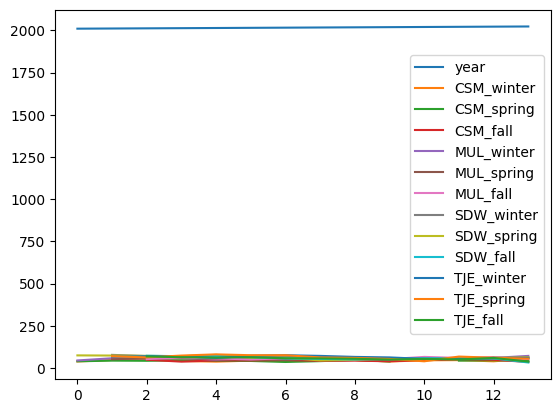

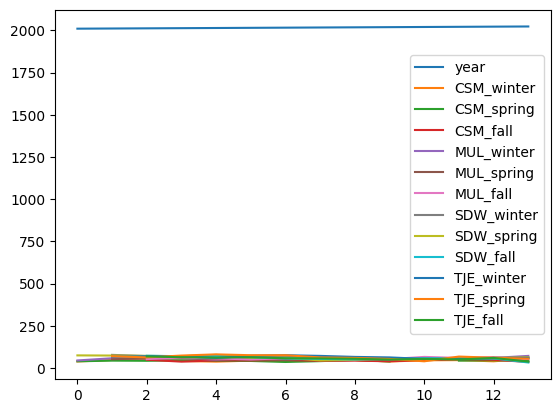

In [2]:
# default plot(): one line plot per col with numeric data
df.plot()

type(df.plot()) # is matplot part of pandas 

### Line plots

we can make a line plot of one column against another by using the following general syntax: 

df.plot(x = 'x_values_column', y = 'y_values_column')

#### Example

If we want to plot the bird surveys at Carpinteria Salt Marsh accross years, we can do:

<AxesSubplot:xlabel='year'>

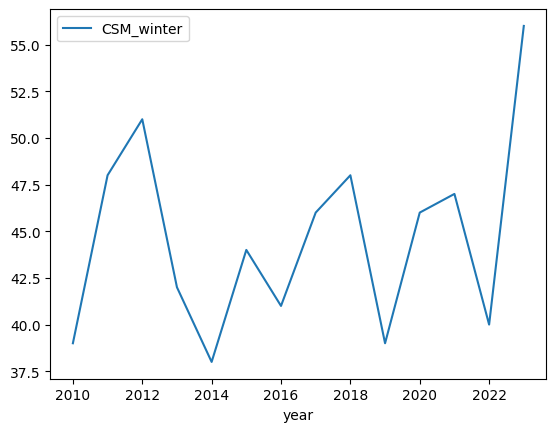

In [3]:
# bird species registered during winter at CSM yearly 
df.plot(x='year', y='CSM_winter')

we can do basic customization specifying other parameters of the `plot()` method:

- `title`: title to use for plot
- `xlabel`: name for x-label on x-axis
- `ylabel`: name for y-label on y-xis
- `color`: color of plot
- `legend`: boolean `True` or `False`. `True` is default value, includes a legend. 

<AxesSubplot:title={'center':'Bird species registered during winter at Carpinteria Salt Marsh'}, xlabel='Year', ylabel='Number of bird species'>

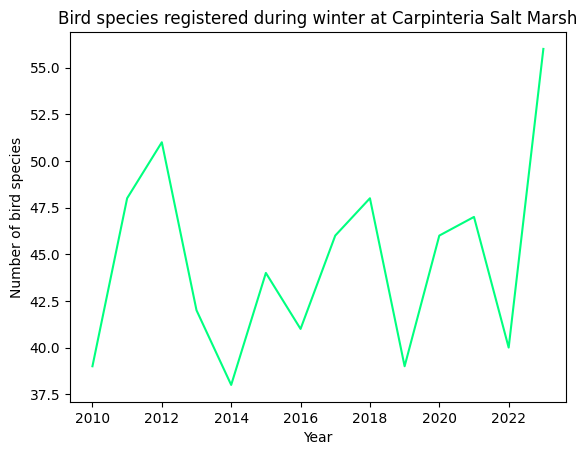

In [4]:
df.plot(x = "year",
        y = "CSM_winter",
       title ='Bird species registered during winter at Carpinteria Salt Marsh',
        xlabel='Year',
        ylabel='Number of bird species',
        color='springgreen',
        legend=False
        )

### Check-in

1. Plot a graph of the spring bird surveys at Mugu Lagoon with respect to the years. Include some basic customization

2. Use the isna() method for `pandas.Series` and row selection to select the rows in which Mugu Lagoon has NAs during the spring survey.

<AxesSubplot:title={'center':'Bird species registered at Mugu Lagoon'}, xlabel='Year', ylabel='Number of bird species'>

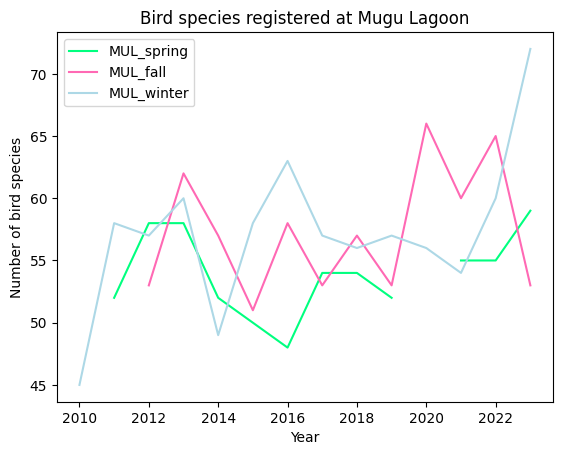

In [5]:
#1

df.plot(
    x = 'year',
    y = ['MUL_spring','MUL_fall','MUL_winter'],
    color = ['springgreen','hotpink','lightblue'],
    title ='Bird species registered at Mugu Lagoon',
    xlabel='Year',
    ylabel='Number of bird species',
    
)

In [6]:
#2 
df[df['MUL_spring'].isna()]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
10,2020,46.0,NaN,47.0,56.0,NaN,66.0,57.0,NaN,58.0,54.0,40.0,54.0


### Multiple Line Plots

We can plot multiple line plots by updating these parameters in the `plot()` method:
- `y`: a list of column names that will be plotted against the x-axis
- `color`: a dictionary `{'column_1':'color_1','column_2':'color_2'}` specifying the color of each column's line plot


#### Example
Let's say we want to compare the bird surveys at the Tijuana Estuary during Spring and Fall across years

<AxesSubplot:title={'center':'Seasonal bird surveys at Tijuana Estuary'}, xlabel='Year', ylabel='Number of bird species'>

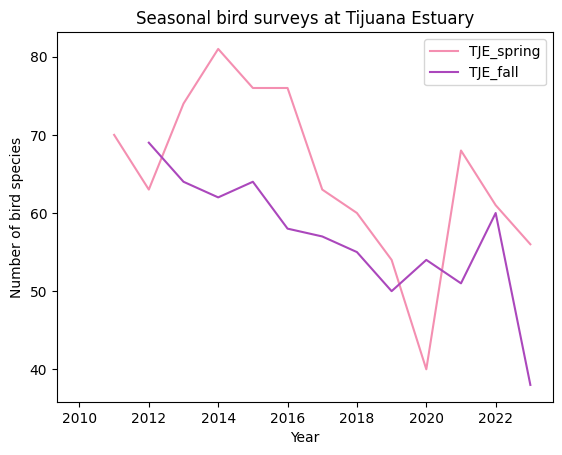

In [7]:
df.plot(x='year', 
        y=['TJE_spring', 'TJE_fall'],
        title = 'Seasonal bird surveys at Tijuana Estuary',
        xlabel='Year',
        ylabel='Number of bird species',        
        color = {'TJE_spring':'#F48FB1',
                 'TJE_fall': '#AB47BC'
                 }
        )

Notice that for specifying colors we used a **HEX code**, this gives us more control over how our graph looks

We can also create separate plots for each col by setting the `subset` to `True`

array([<AxesSubplot:xlabel='Year', ylabel='Number of bird species'>,
       <AxesSubplot:xlabel='Year', ylabel='Number of bird species'>],
      dtype=object)

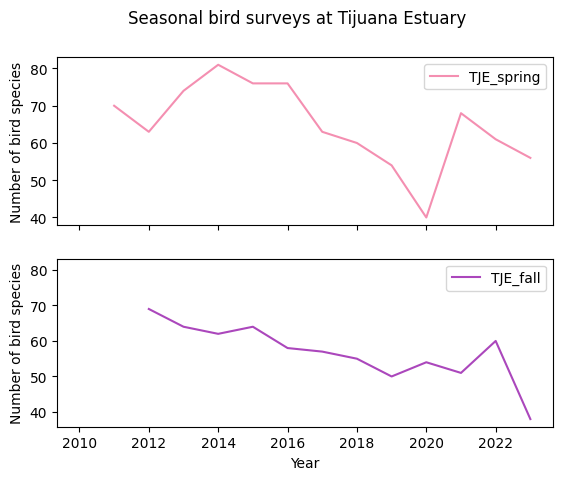

In [8]:
df.plot(x='year', 
        y=['TJE_spring', 'TJE_fall'],
        title = 'Seasonal bird surveys at Tijuana Estuary',
        xlabel='Year',
        ylabel='Number of bird species',        
        color = {'TJE_spring':'#F48FB1',
                 'TJE_fall': '#AB47BC'
                 },
        subplots=True
        )

### Updating the index

**updating the index** for our data frame to be something other than the default integers numbering the rows can be a useful operation for plotting. To update the index we use the `set_index()` method for `pandas.DataFrame`. it's general syntax is: 

```
df = df.set_index(new_index)
```
where `new_index` is:
- the name of the col in the data frame `df` we want to use as new index
- if our new index is not a column in the data frame, an array or `pandas.Series` of the same length as our data frame  (we need one index per row)

this operation does not happen in-place
- a function **acting in-place** means that our original object (in this case a `pandas.DataFrame)` is modified)
- if the function **does not act in-place**, a new object (in this case a `pandas.DataFrame`) is created and the original is not modified

if we wanted to update our `df` data frame we would do an **explicit assignment** to reassign the output of `set_index()` to `df`:

```
# set `column_name` column in df as the new index (reassignment)
df = df.set_index('column_name')
```
or use the optional `inplace` parameter

```
# set the 'column_name' column in df as the new index (reassignment)
df = df.set_index('column_name', inplace=True)
```

In general, avoid using the `inplace=True` argument and favor explicit variable assignments for better readability and maintainable code. explicitly assigning the result to a new variable or the same variable makes it clear that an operation has occurred

#### Example
in all our previous examples we used the year col as the x-axis. since all our bird survey variables are dependent on the year, it makes sense to use the year col as the index of the data frame:

In [9]:
# update index to year col
df = df.set_index('year')
df.head()

,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
year,,,,,,,,,,,,
2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


<AxesSubplot:xlabel='year'>

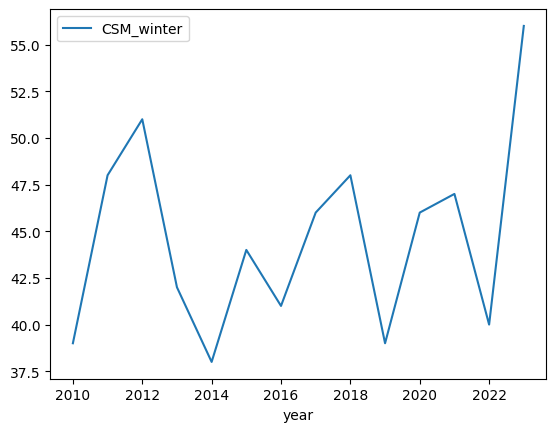

In [10]:
# simple plot of Carpinteria Salt Marsh winter surveys
df.plot(y='CSM_winter')

### Check-in
1. without running the code, give a step-by-step breakdown of what this code is doing:

```
df.set_index('year').loc[:,'SDW_winter:'TJE_fall'].plot()

```
- the code is setting the index to the col 'year', then it uses loc to to label-based selection of all the rows between cols SDW_winter and TJE_fall, and then plots the result

2. is the code modifying the df? 
- no, it is not, it is not an in-place operation so it creates a new df and that is used for plotting. the original remains untouched

3. run the code and examine the graph. review the data description. do we have all the necessary info to make sure it makes sense to directly compare the surveys at these different sites?


<AxesSubplot:xlabel='year'>

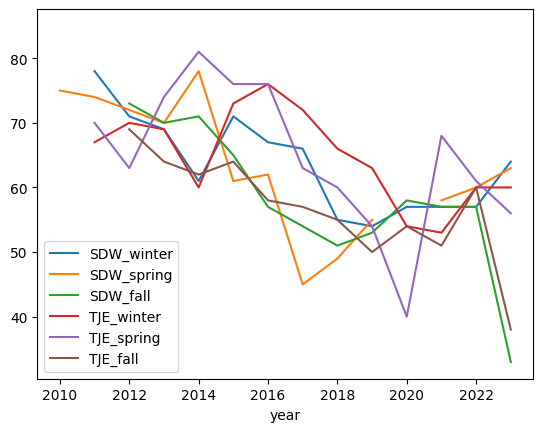

In [11]:
df.loc[:,'SDW_winter':'TJE_fall'].plot()

### Method chaining

the code used in the check-in is an example of **method chaining**. each method in the chain returns an object (typically the same object), allowing the next method to be called directly on the result. this is a powerful technique that makes code concise and readable

chaining methods can result in lines of code that are too long and hard to read. we can break up chains of methods by using parenthesis:

```
(df.set_index('year')
.loc[:,'SDW_winter':'TJE_fall']
.plot()
)
```

#### Method chaining and the R pipe operator
If you are familiar with R, you may have noticed that the period . in the method chianing acts in the same way as the R pipe operator (`%>%` or `|>`). The syntax of one method per line is similar to what is used in the tidyverse, except that the pipe is used at the end of the line, while the period is used at the beginning of the line.

An alternative to the previous code chaining could have been:

```
year_index_df = df.set_index('year')
subset_df = year_index_df.loc[:,'SDW_winter':'TJE_fall']
subset_df.plot()

```

while this accomplishes the same output, several variables are created along the way and it can be difficult to keep track of what is what

### Aboult the data

For the next plots we will use the Palmer Penguins dataset [2] developed by Drs. Allison Horst, Alison Hill and Kristen Gorman. This dataset contains size measurements for three penguin species in the Palmer Archipelago, Antarctica during 2007, 2008, and 2009.

The dataset has 344 rows and 8 columns. We can see it’s first three rows below:

#### Data Exploration

The data is usually accessed through the `palmerpenguins` R data package [2]. In this lesson we will access the CSV directly into our workspace using the URL: https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv



In [12]:
# let's read in the data
# Read in data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [13]:
# let's get preliminary info
# check column data types and NA values
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [14]:
# simple stats about numeric cols
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [15]:
# can also subset the df to get info about a particular col or group of cols 
# count unique values in categorical columns and year
penguins[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [16]:
# get unique values in species column
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [23]:
# number of values per unique value in species column
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

### `kind` argument in `plot()`

At the beginning of the lesson we talked about how the `plot()` method creates a line plot by default. the parameter that controls this behaviour is the `kind` parameter. by changing the value of `kind` we can create different kinds of plots. 

the default value of `kind` is `line`

let's change the `kind` parameter to create different plots.


### Scatter plots
suppose we want to visually compare the flipper length against the body mass. we can do this with a scatterplot:

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

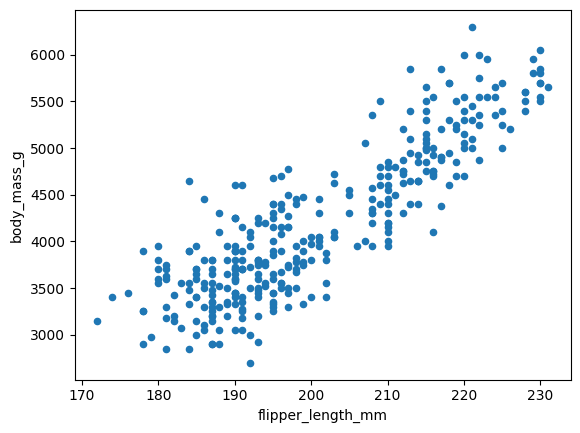

In [24]:
penguins.plot(kind = 'scatter',
             x = 'flipper_length_mm',
             y = 'body_mass_g')

we can update other arguments to customize the graph

<AxesSubplot:title={'center':'Flipper length and body mass for Palmer penguins'}, xlabel='Flipper length (mm)', ylabel='Body mass (g)'>

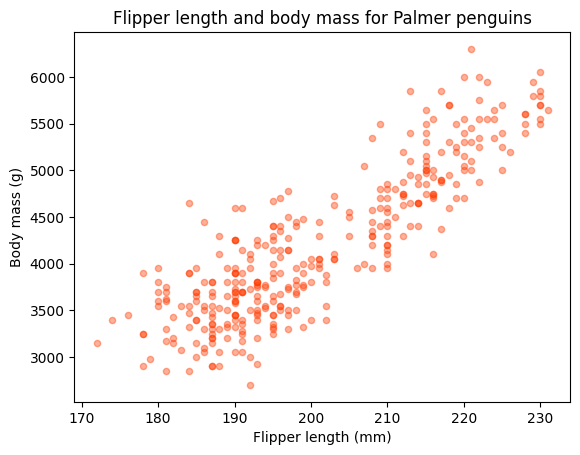

In [25]:
penguins.plot(kind='scatter',
              x='flipper_length_mm', 
              y='body_mass_g',
              title='Flipper length and body mass for Palmer penguins',
              xlabel='Flipper length (mm)',
              ylabel='Body mass (g)',
              color='#ff3b01',
              alpha=0.4  # Controls transparency
              )

### Bar plots
we can create bar plots of our data setting `kind='bar'` in the `plot()` method

for example, let's say we want to get data about the 10 penguins with the lowest body mass. we can first select the data using the `nsmallest()` method for series:

[]

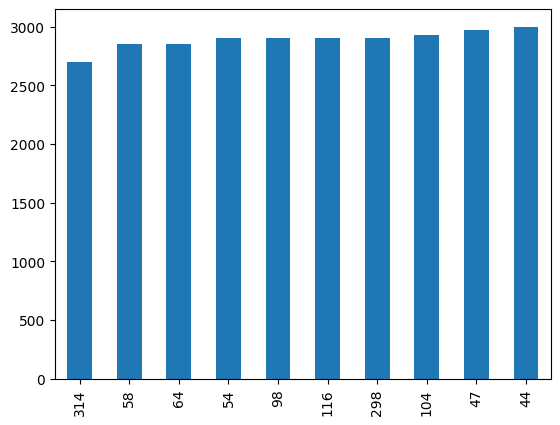

In [31]:
smallest = penguins['body_mass_g'].nsmallest(10).plot(kind = 'bar')
smallest

# or

smallest.plot(kind = 'bar')


In [34]:
# if we want to see data for the 10 smallest, as well as the rest of the columns, we can do:
penguins.nsmallest(10,'body_mass_g')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,female,2008
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,female,2008
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
98,Adelie,Dream,33.1,16.1,178.0,2900.0,female,2008
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,female,2009
298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,female,2007
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,female,2009
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
44,Adelie,Dream,37.0,16.9,185.0,3000.0,female,2007


### Histograms
we can create a histogram of our data setting `kind = 'hist'` in `plot()`

<AxesSubplot:ylabel='Frequency'>

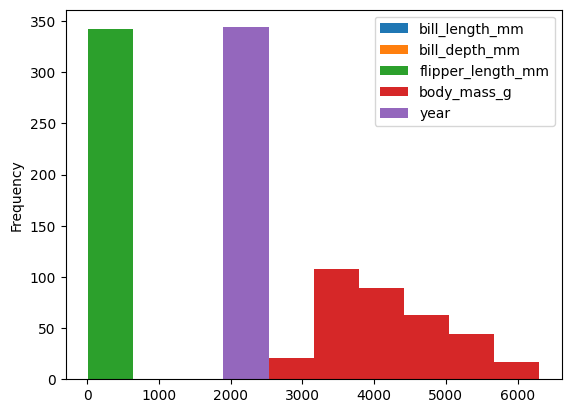

In [35]:
# using plot without subsetting data = a mess again
penguins.plot(kind ='hist')

To gain actual info, let's subset the data before plotting it. for example, suppose we want to do a preliminary graph for the distribution of flipper length. we could do this:

<AxesSubplot:title={'center':'Penguin flipper lengths'}, ylabel='Frequency'>

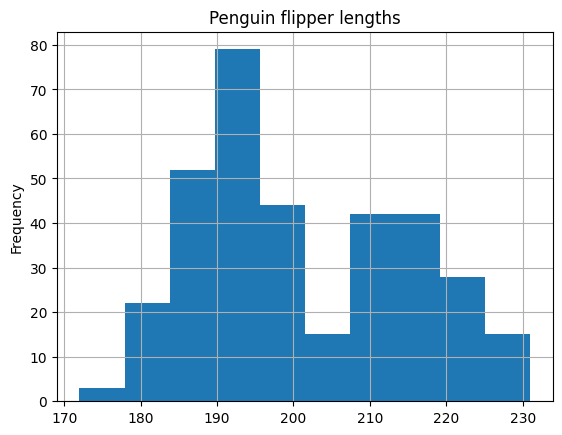

In [40]:
# distribution of flipper length measurements
# first, select data. then plot

penguins['flipper_length_mm'].plot(kind = 'hist',
                                  title = 'Penguin flipper lengths',
                                xlabel='Flipper length (mm)',
                                grid=True)

### Check-in

1. select the `bill_length_mm` and `bill_depth_mm` cols in the `penguins` dataframe and update the kind parameter to `box` to make boxplots of the bill length and bill depth

2. create a simple histogram of the flipper length of female gentoo penguins

<AxesSubplot:>

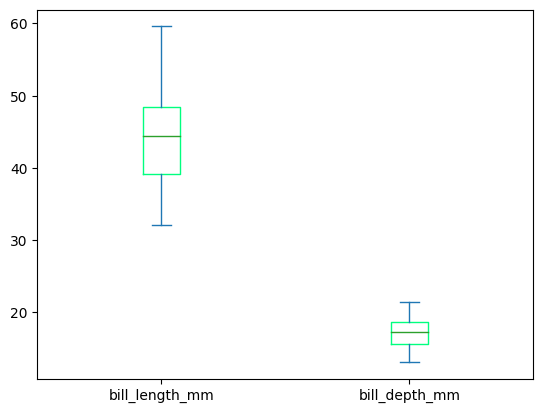

In [53]:
#1
penguins[['bill_length_mm','bill_depth_mm']].plot(kind = 'box',
                                                 color = {'boxes':'springgreen'})

<AxesSubplot:ylabel='Frequency'>

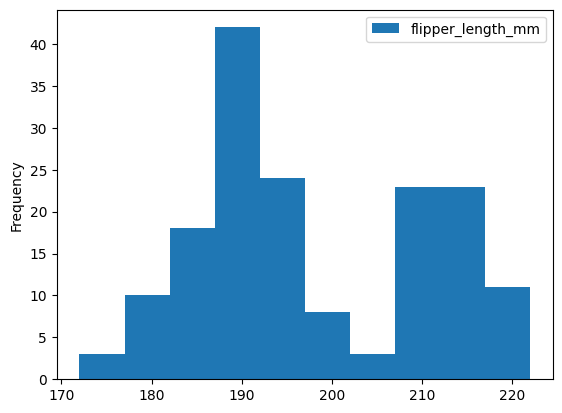

In [69]:
#2
penguins.loc[penguins['sex']=='female',['flipper_length_mm']].plot(kind='hist')